<a href="https://colab.research.google.com/github/Chieh-YuHung-hub/HTM737/blob/main/Final_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv("df_master.csv")
# I’ve saved the Week 10 syntax as a CSV file.

df.head()
df.columns

Index(['Provider Number', 'Hospital Name', 'Address', 'City', 'State',
       'Zip Code', 'County Name',
       'Unweighted Normalized Clinical Care Domain Score',
       'Weighted Normalized Clinical Care Domain Score',
       'Unweighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score',
       ...
       'Overall Rating of Hospital Floor',
       'Overall Rating of Hospital Achievement Threshold',
       'Overall Rating of Hospital Benchmark',
       'Overall Rating of Hospital Baseline Rate',
       'Overall Rating of Hospital Performance Rate',
       'Overall Rating of Hospital Achievement Points',
       'Overall Rating of Hospital Improvement Points',
       'Overall Rating of Hospital Dimension Score', 'HCAHPS Base Score',
       'HCAHPS Consistency Score'],
      dtype='object', length=170)

In [39]:
for col in df.columns:
  print(col)

#Check the viriables I need

Provider Number
Hospital Name
Address
City
State
Zip Code
County Name
Unweighted Normalized Clinical Care Domain Score
Weighted Normalized Clinical Care Domain Score
Unweighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score
Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score
Unweighted Normalized Safety Domain Score
Weighted Safety Domain Score
Unweighted Normalized Efficiency and Cost Reduction Domain Score
Weighted Efficiency and Cost Reduction Domain Score
Total Performance Score
MORT-30-AMI Achievement Threshold
MORT-30-AMI Benchmark
MORT-30-AMI Baseline Rate
MORT-30-AMI Performance Rate
MORT-30-AMI Achievement Points
MORT-30-AMI Improvement Points
MORT-30-AMI Measure Score
MORT-30-HF Achievement Threshold
MORT-30-HF Benchmark
MORT-30-HF Baseline Rate
MORT-30-HF Performance Rate
MORT-30-HF Achievement Points
MORT-30-HF Improvement Points
MORT-30-HF Measure Score
MORT-30-PN Achievement Threshold
MORT-30-PN Bench

In [47]:
cols = [
    'Total Performance Score',
    'Weighted Normalized Clinical Care Domain Score',
    'Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score',
    'Weighted Safety Domain Score',
    'Weighted Efficiency and Cost Reduction Domain Score'
        ]

#HVBP uses weighted score

df_cond = df[cols].copy()
df_cond.head()

#df_cond = condensed dataframe

,Total Performance Score,Weighted Normalized Clinical Care Domain Score,Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score,Weighted Safety Domain Score,Weighted Efficiency and Cost Reduction Domain Score
0,35.547619047619,10.833333333333,6.500000000000,18.214285714286,0.000000000000
1,33.523809523810,4.166666666667,9.000000000000,20.357142857143,0.000000000000
2,22.702380952381,6.666666666667,4.250000000000,11.785714285714,0.000000000000
3,27.555555555556,8.888888888889,18.666666666667,Not Available,0.000000000000
4,28.630952380952,11.666666666667,6.250000000000,10.714285714286,0.000000000000


# **Scatter Plots**

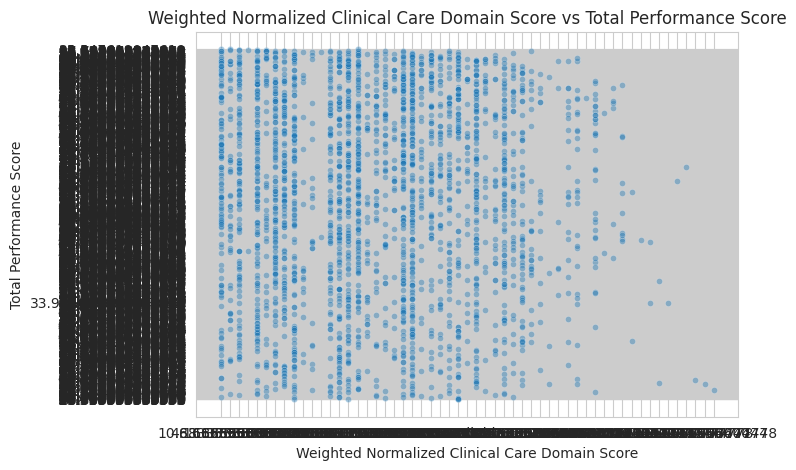

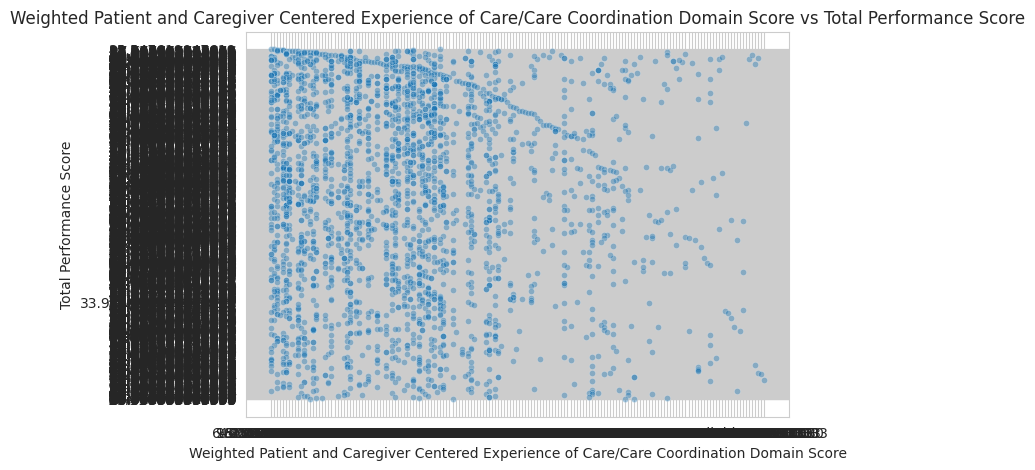

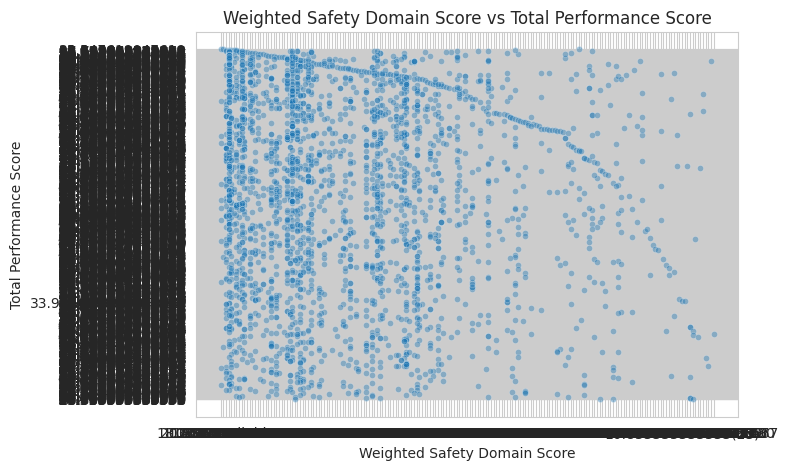

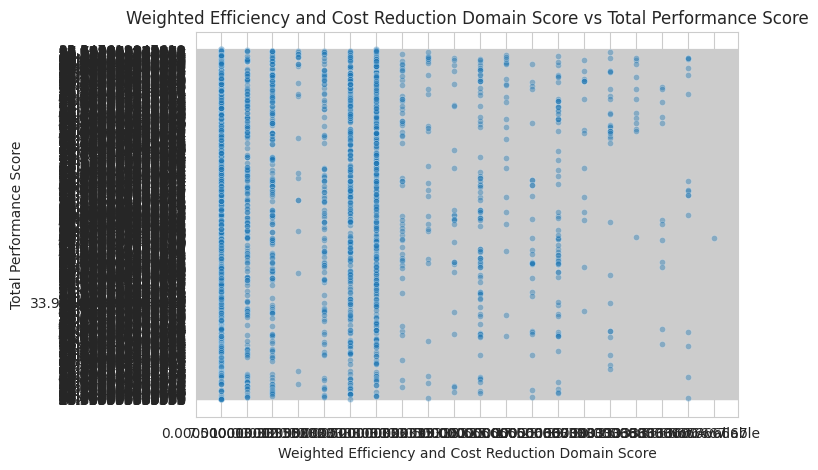

In [54]:
tps = df_cond.columns[0]
#tps = Total Performance Score

domains = df_cond.columns[1:]
#The four domains

for domain in domains:
    plt.figure(figsize=(7, 5))

    sns.scatterplot(
        x=df_cond[domain],
        y=df_cond[tps],
        alpha=0.4, # Degree of transparency for the points
        s=20   # Size of the points
    )

    plt.title(f'{domain} vs Total Performance Score')
    plt.xlabel(domain)
    plt.ylabel('Total Performance Score')
    plt.show()


In [59]:
df_clean = df_cond.copy()

for col in df_clean.columns:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

    '''
    Convert the column to numeric
    coerce: invalid parsing will be set as NaN
    '''

df_clean = df_clean.dropna()
# Remove rows that contain NaN values

In [60]:
df_clean.dtypes

,0
Total Performance Score,float64
Weighted Normalized Clinical Care Domain Score,float64
Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score,float64
Weighted Safety Domain Score,float64
Weighted Efficiency and Cost Reduction Domain Score,float64


In [63]:
corr = df_clean.corr()['Total Performance Score'][1:]
corr

#Calculate the correlation coefficients between each domain and the Total Performance Score

,Total Performance Score
Weighted Normalized Clinical Care Domain Score,0.345079
Weighted Patient and Caregiver Centered Experience of Care/Care Coordination Domain Score,0.566337
Weighted Safety Domain Score,0.553575
Weighted Efficiency and Cost Reduction Domain Score,0.652251


# **Correlarion Heatmap**

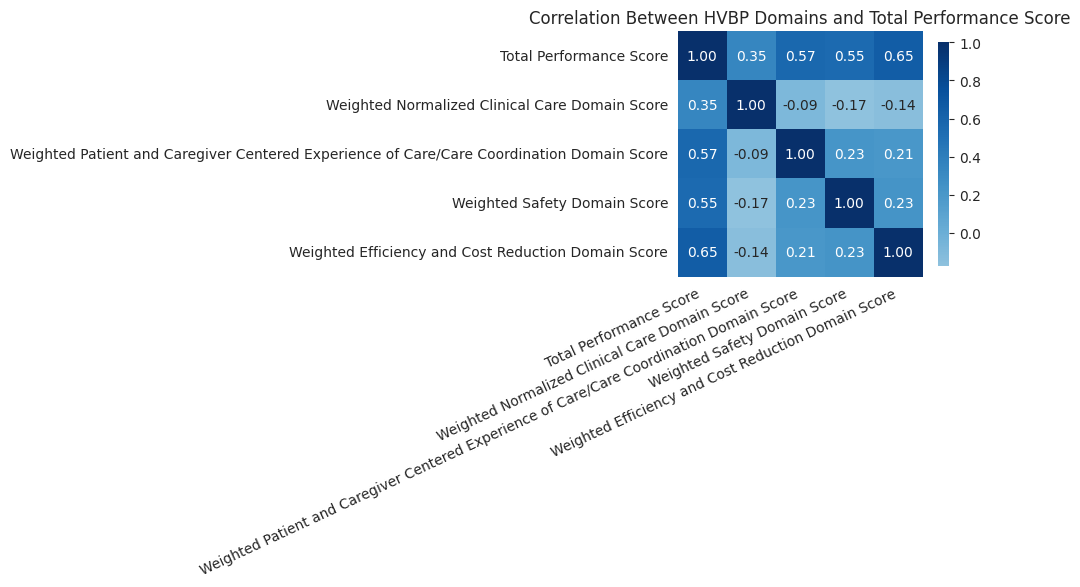

In [84]:
plt.figure(figsize=(10, 8))

sns.heatmap(
    df_clean.corr(),
    annot=True, # Display correlation values
    cmap='Blues', # Diverging color palette
    center=0, # Center the colormap at zero
    fmt='.2f',
    cbar_kws={"shrink": 0.5}, # Maintain the size of the bar
    square=True # Keep the shape of each correlation coefficient as square
)

plt.title('Correlation Between HVBP Domains and Total Performance Score')
plt.xticks(rotation=25, ha='right')   # Rotate x-axis labels for readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# **Correlation Ranking (Bar Chart)**

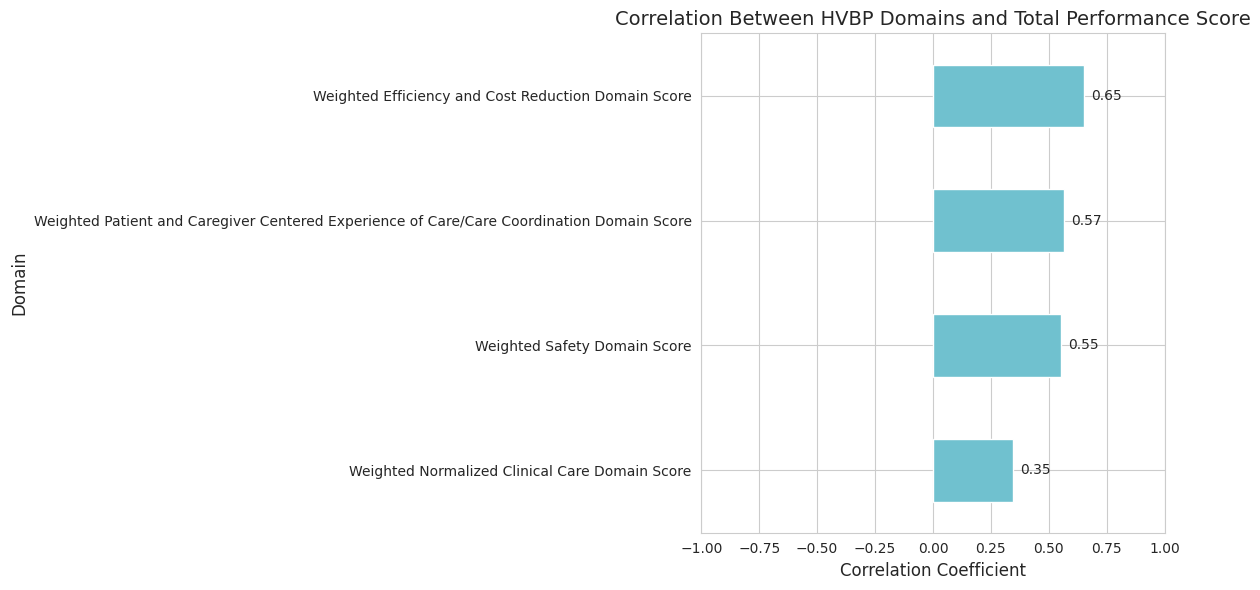

In [94]:
plt.figure(figsize=(12, 6))

corr_sorted = corr.sort_values() # Sort correlation from low to high

ax = corr_sorted.plot(
    kind='barh',
    color='#70C1CF'
)

plt.title('Correlation Between HVBP Domains and Total Performance Score', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Domain', fontsize=12)


ax.bar_label(ax.containers[0], fmt='%.2f', padding=5)

plt.xlim(-1, 1)  # Correlation range is -1 to +1
plt.tight_layout()
plt.show()